# (02) Daniel

**Motivation**: save raw data (both bold & ca) as matlab files. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Copy files to desktop

In [12]:
from scipy import io as sio

src = '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3'
tgt = '/home/hadi/Desktop/Hadi-SLC'

In [3]:
shapes = collections.defaultdict(list)
for mode in ['bold', 'ca2']:
    path = pjoin(src, mode)
    for f in sorted(os.listdir(path)):
        desc = next(e for e in f.split('_') if 'desc' in e)
        if 'run' not in f:
            continue
        if mode == 'bold' and desc not in ['desc-raw', 'desc-rabies-hp']:
            continue
        if mode == 'ca2' and desc != 'desc-preproc':
            continue
        data = np.load(pjoin(path, f))
        save_file = pjoin(tgt, mode, f"{f.split('.')[0]}.mat")
        sio.savemat(save_file, dict(data=data))
        shapes['_'.join([mode, desc])].append(data.shape)

In [4]:
shapes_count = {
    k: collections.Counter(v)
    for k, v in shapes.items()
}
shapes_count

{
    'bold_desc-rabies-hp': Counter({
        (1438, 536): 3,
        (1438, 372): 1,
        (1438, 477): 3,
        (1438, 480): 3,
        (1438, 466): 1,
        (1438, 478): 3,
        (1438, 445): 1,
        (1438, 488): 4,
        (1438, 496): 5,
        (1438, 524): 5,
        (1438, 493): 3,
        (1438, 506): 4,
        (1438, 531): 6,
        (1438, 512): 5,
        (1438, 499): 1,
        (1438, 472): 2,
        (1438, 491): 4,
        (1438, 522): 2,
        (1438, 482): 3,
        (1438, 550): 1,
        (1438, 474): 3,
        (1438, 517): 6,
        (1438, 529): 1,
        (1438, 518): 1,
        (1438, 388): 1,
        (1438, 519): 3,
        (1438, 473): 2,
        (1438, 380): 1,
        (1438, 533): 2,
        (1438, 516): 4,
        (1438, 546): 1,
        (1438, 537): 3,
        (1438, 500): 5,
        (1438, 501): 2,
        (1438, 334): 1,
        (1438, 514): 6,
        (1438, 498): 3,
        (1438, 489): 2,
        (1438, 304): 1,
        (1438, 490): 2,
        (1438, 481): 1,
        (1438, 508): 1,
        (1438, 465): 2,
        (1438, 497): 3,
        (1438, 487): 3,
        (1438, 470): 1,
        (1438, 476): 1,
        (1438, 463): 1,
        (1438, 414): 1,
        (1438, 361): 1,
        (1438, 415): 1,
        (1438, 366): 2,
        (1438, 464): 2,
        (1438, 486): 1,
        (1438, 483): 2,
        (1438, 455): 1,
        (1438, 442): 1,
        (1438, 439): 1,
        (1438, 510): 3,
        (1438, 475): 1,
        (1438, 520): 3,
        (1438, 340): 1,
        (1438, 538): 2,
        (1438, 406): 2,
        (1438, 513): 3,
        (1438, 523): 3,
        (1438, 484): 1,
        (1438, 453): 3,
        (1438, 526): 2,
        (1438, 505): 1,
        (1438, 438): 2,
        (1438, 446): 1,
        (1438, 492): 4,
        (1438, 468): 1,
        (1438, 507): 1,
        (1438, 511): 2,
        (1438, 515): 2,
        (1438, 467): 1,
        (1438, 457): 1,
        (1438, 343): 1,
        (1438, 525): 3,
        (1438, 532): 2,
        (1438, 534): 2,
        (1438, 521): 1,
        (1438, 547): 1,
        (1438, 527): 2,
        (1438, 495): 1,
        (1438, 428): 1,
        (1438, 469): 1,
        (1438, 421): 1,
        (1438, 544): 1,
        (1438, 441): 1,
        (1438, 391): 1,
        (1438, 528): 2,
        (1438, 423): 1,
        (1438, 541): 1,
        (1438, 540): 1
    }),
    'bold_desc-raw': Counter({(1438, 600): 206}),
    'ca2_desc-preproc': Counter({
        (226, 6000): 188,
        (226, 5999): 13,
        (226, 5200): 1
    })
}

## np to nii code

In [13]:
lookup = np.load(
    pjoin(tgt, 'roi_lookup.npy'),
    allow_pickle=True,
).item()

print(list(lookup))

['ca2', 'bold']

In [18]:
print(f"Num BOLD ROIs: {len(lookup['bold'])},\tNum CA2 ROIs: {len(lookup['ca2'])}")

Num BOLD ROIs: 1438,    Num CA2 ROIs: 226

In [21]:
brain = np.load(pjoin(tgt, 'brain_100um.npy'))
brain.shape

(132, 80, 114)

In [26]:
regions = np.unique(brain[brain != 0])
len(regions)

1454

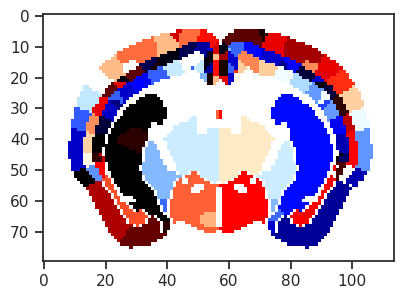

In [35]:
x = brain[60].copy().astype(float)
x[x == 0] = np.nan

plt.imshow(x, cmap='flag_r')
plt.show()

In [38]:
x = np.load(pjoin(tgt, 'run_pi.npy'))
x = avg(x)
np.save(pjoin(tgt, 'example.npy'), x)

In [44]:
x = np.load(pjoin(tgt, 'example.npy'))
data_3d = np.zeros(brain.shape, dtype=float)


In [47]:
kk = 0

for node, region_id in lookup['bold'].items():
    mask = brain == region_id
    data_3d[mask] = x[kk, node]

<matplotlib.image.AxesImage object at 0x7f0d55715790>

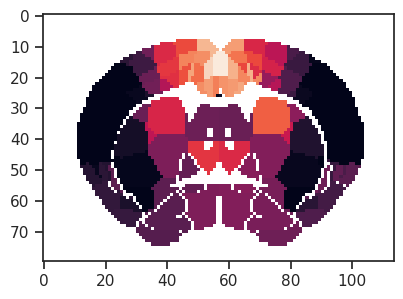

In [68]:
slice_i = 52
data2plot = data_3d[slice_i].copy()
data2plot[brain[slice_i] == 0] = np.nan
plt.imshow(data2plot, vmin=0.1)

In [70]:
import ants

img = ants.from_numpy(data_3d)
img

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (1.0, 1.0, 1.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [73]:
ants.image_write(img, pjoin(tgt, 'example.nii'))

## Save node loockup as mat array

In [27]:
from scipy import io as sio
tgt = '/home/hadi/Desktop/Hadi-SLC'

In [2]:
mice = Mice(192)

In [30]:
dict2save = {}
for mode, d in mice.node_lookup.items():
    x = np.array(list(d.values()))
    dict2save[mode] = x
    
dict2save

{
    'ca2': array([ 18,  19,  20,  22,  25,  26,  28,  30,  31,  34,  36,  38,  40,
        41,  42,  43,  47,  49,  52,  53,  55,  56,  57,  59,  62,  63,
        65,  66,  68,  69,  71,  73,  74,  75,  77,  78,  80,  81,  82,
        83,  86,  87,  89,  90,  92,  93,  95,  98,  99, 100, 101, 103,
       105, 107, 108, 110, 111, 112, 113, 114, 115, 117, 119, 121, 122,
       123, 125, 126, 127, 128, 129, 131, 132, 136, 137, 138, 139, 140,
       141, 143, 144, 147, 149, 150, 151, 152, 153, 154, 157, 158, 160,
       161, 162, 163, 164, 165, 167, 168, 170, 172, 173, 174, 175, 176,
       178, 179, 180, 181, 182, 183, 185, 186, 187, 594, 595, 596, 598,
       601, 602, 604, 606, 607, 610, 612, 614, 616, 617, 618, 619, 623,
       625, 628, 629, 631, 632, 633, 635, 638, 639, 641, 642, 644, 645,
       647, 649, 650, 651, 653, 654, 656, 657, 658, 659, 662, 663, 665,
       666, 668, 669, 671, 674, 675, 676, 677, 679, 681, 683, 684, 686,
       687, 688, 689, 690, 691, 693, 695, 697, 698, 699, 701, 702, 703,
       704, 705, 707, 708, 712, 713, 714, 715, 716, 717, 719, 720, 723,
       725, 726, 727, 728, 729, 730, 733, 734, 736, 737, 738, 739, 740,
       741, 743, 744, 746, 748, 749, 750, 751, 752, 754, 755, 756, 757,
       758, 759, 761, 762, 763]),
    'bold': array([   1,    2,    3, ..., 1452, 1453, 1454])
}

In [32]:
sio.savemat(pjoin(tgt, 'roi_dictionary.mat'), dict2save)

In [33]:
len(x), len(mice.parcel.df)

(1438, 1454)

In [34]:
x

array([   1,    2,    3, ..., 1452, 1453, 1454])

In [35]:
delta = sorted(set(np.arange(1, len(mice.parcel.df) + 1)).difference(x))
delta

[
    391,
    395,
    502,
    532,
    543,
    563,
    565,
    570,
    967,
    971,
    1078,
    1108,
    1119,
    1139,
    1141,
    1146
]

In [36]:
df = mice.parcel.df.copy()
df[df.id.isin(delta)]

,id,acro,hemis,region,layer
390,391,Isocortex,1,7,2
394,395,Isocortex,1,11,2
501,502,Isocortex,1,118,2
531,532,Isocortex,1,148,2
542,543,Isocortex,1,159,2
562,563,Isocortex,1,179,2
564,565,Isocortex,1,181,2
569,570,Isocortex,1,186,2
966,967,Isocortex,2,7,2
970,971,Isocortex,2,11,2


In [37]:
{k: len(v) for k, v in dict2save.items()}

{'ca2': 226, 'bold': 1438}

## Save template/parcel3d

In [2]:
mice = Mice(192)

In [5]:
mice.al

╭──────────────────────────────────────────────────────────────────╮
│                        Allen mouse 100um                         │
│                                                                  │
│         name:  allen_mouse (v1.2)                                │
│      species:  Mus musculus                                      │
│     citation:  Wang et al 2020                                   │
│                https://doi.org/10.1016/j.cell.2020.04.007        │
│         link:  http://www.brain-map.org                          │
│                                                                  │
│  orientation:  asr                                               │
│    symmetric:  True                                              │
│   resolution:  [100.0, 100.0, 100.0]                             │
│        shape:  [132, 80, 114]                                    │
╰──────────────────────────────────────────────────────────────────╯

In [7]:
mice.al.load_everything()

In [9]:
mice.parcel['brain'].shape, mice.al.template.shape

((132, 80, 114), (132, 80, 114))

In [10]:
import ants

brain_img = ants.from_numpy(mice.parcel['brain'])
template_img = ants.from_numpy(mice.al.template)

brain_img

ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (1.0, 1.0, 1.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [11]:
template_img

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (1.0, 1.0, 1.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [15]:
ants.image_write(brain_img, pjoin(tmp_dir, 'parcel3d_100um.nii.gz'))
ants.image_write(template_img, pjoin(tmp_dir, 'template_100um.nii.gz'))

### Do 10um version

In [23]:
from register.atlas import Allen

al = Allen(10, full_load=True)

In [24]:
template_img = ants.from_numpy(al.template)
template_img

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (1320, 800, 1140)
         Spacing    : (1.0, 1.0, 1.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [25]:
ants.image_write(template_img, pjoin(tmp_dir, 'template_10um.nii'))
ants.image_write(template_img, pjoin(tmp_dir, 'template_10um.nii.gz'))